In this project I will be taking the data set from the OilyGiant mining company and finding the best place for a new well based on the parameters of oil quality and volume of reserves. To do this I will need to collect the oil well parameters (oild quality and volume of reserves) in the selected regions, build a model for predicting the volume of reserves in the new wells and then pick the oil wells with the highest estimated values and by proxy I will then pick the region with the highest total profit for the new well. There are three main regions that the parameters are already known so I will use these to build the model using the bootstrapping technique. To start, I will download and prepare the data.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:

# Load the datasets from the datasets folder
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')


Clean the data by checking for missing values, filling them with the mean, and removing duplicates: 

In [3]:
def clean_data(data):
    """Cleans the dataset by handling missing values and duplicates"""
    print("\nMissing values before cleaning:")
    print(data.isnull().sum())
    
    # Fill missing values with the mean
    data.fillna(data.mean(), inplace=True)
    
    # Remove duplicates
    duplicates_before = data.duplicated().sum()
    data.drop_duplicates(inplace=True)
    
    print(f"Removed {duplicates_before} duplicate entries")
    return data
# Clean each dataset
print("\n=== Cleaning Region 0 Data ===")
data_0 = clean_data(data_0)
print("\n=== Cleaning Region 1 Data ===")
data_1 = clean_data(data_1)
print("\n=== Cleaning Region 2 Data ===")
data_2 = clean_data(data_2)


=== Cleaning Region 0 Data ===

Missing values before cleaning:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Removed 0 duplicate entries

=== Cleaning Region 1 Data ===

Missing values before cleaning:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Removed 0 duplicate entries

=== Cleaning Region 2 Data ===

Missing values before cleaning:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Removed 0 duplicate entries


In [4]:
# Constants
N_SAMPLES = 500              # Points to study per region
TOP_WELLS = 200              # Best wells to select
BUDGET = 100_000_000         # $100 million budget
REVENUE_PER_BARREL = 4.5   # $4.5 revenue per barrel (product is in thousand barrels)


Now I will check over the cleaned and prepared data: 

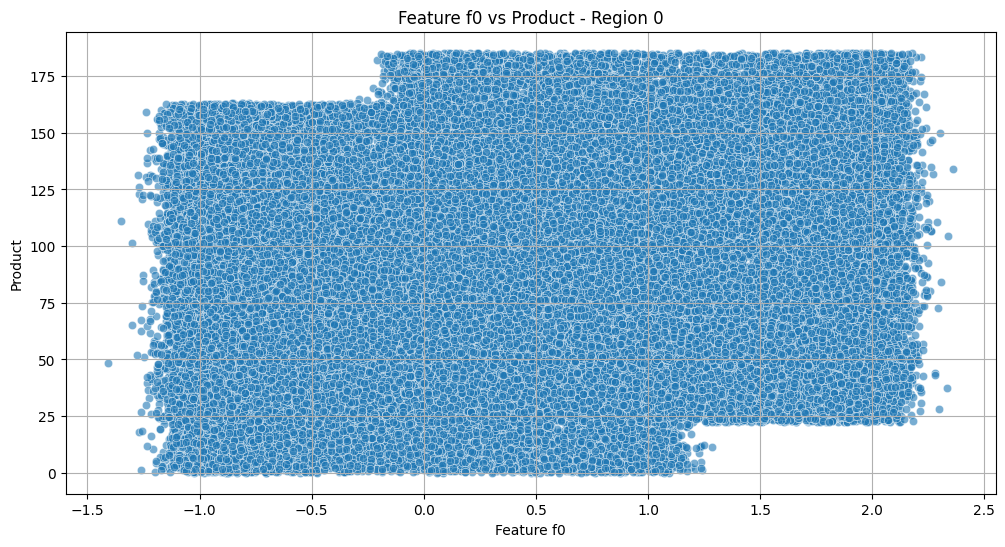

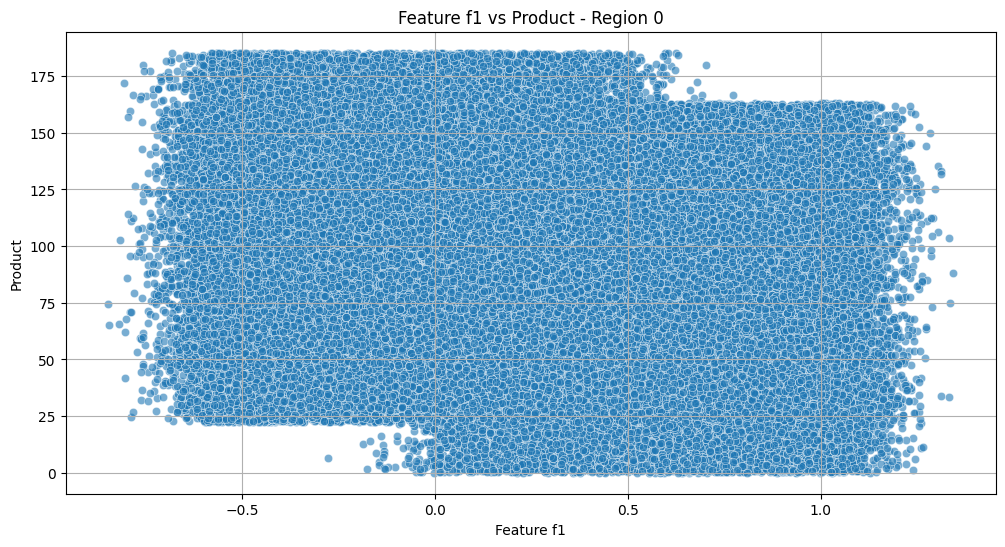

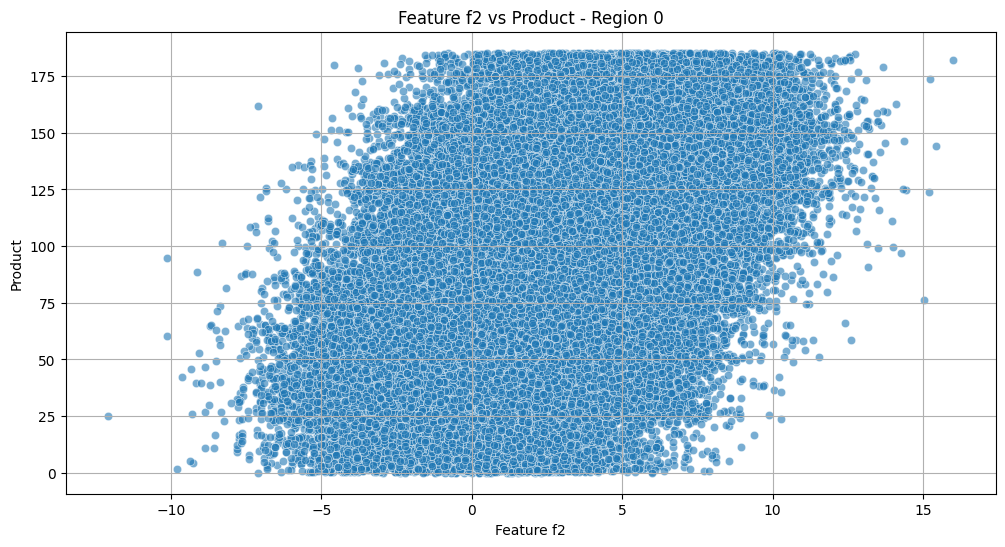

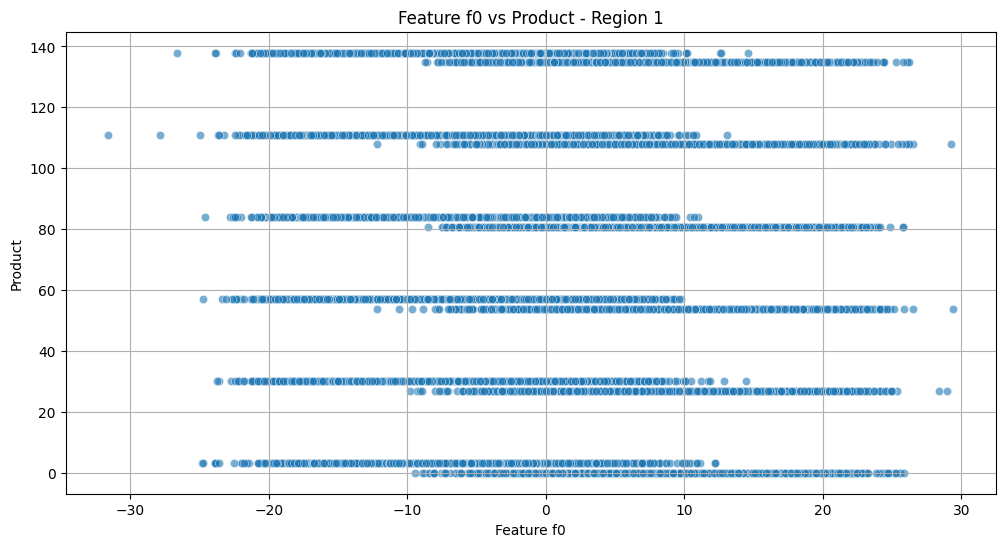

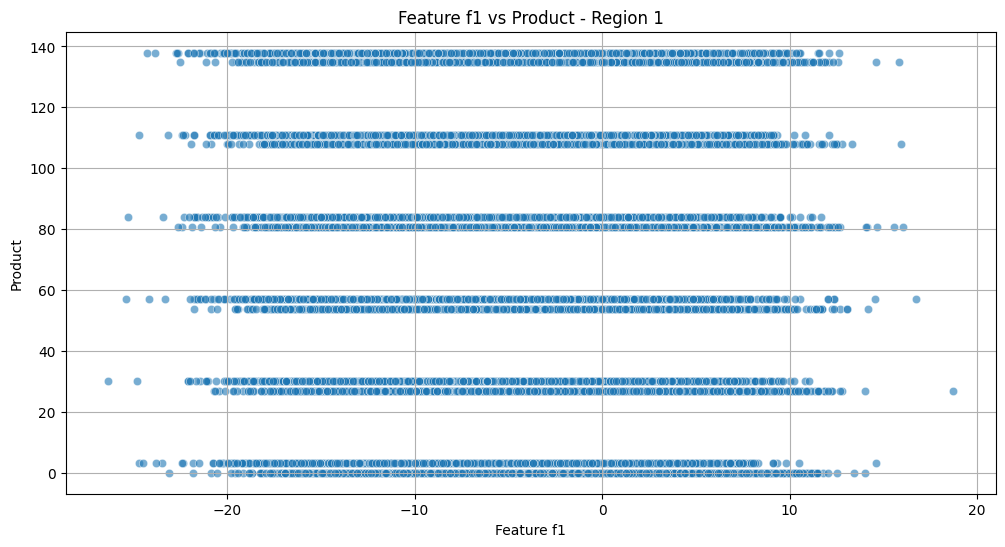

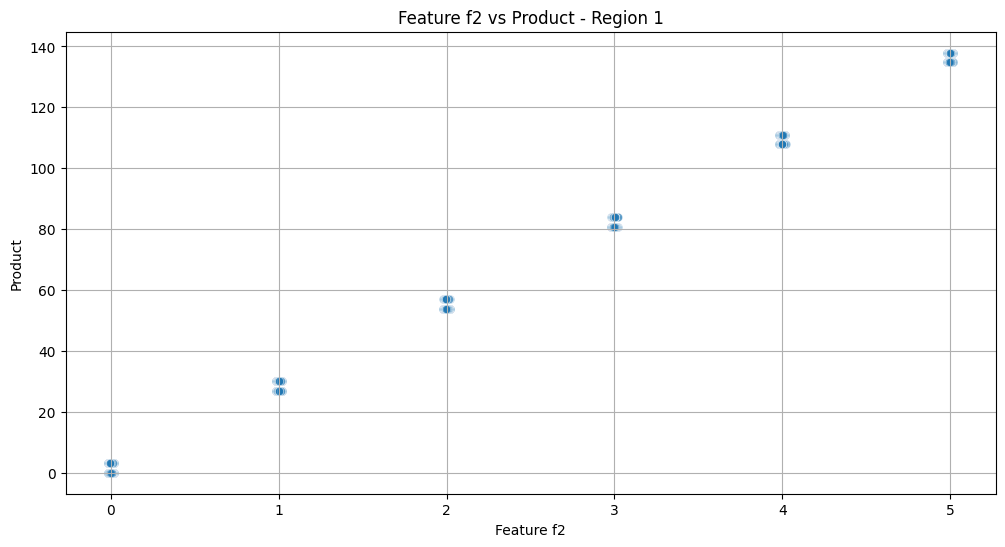

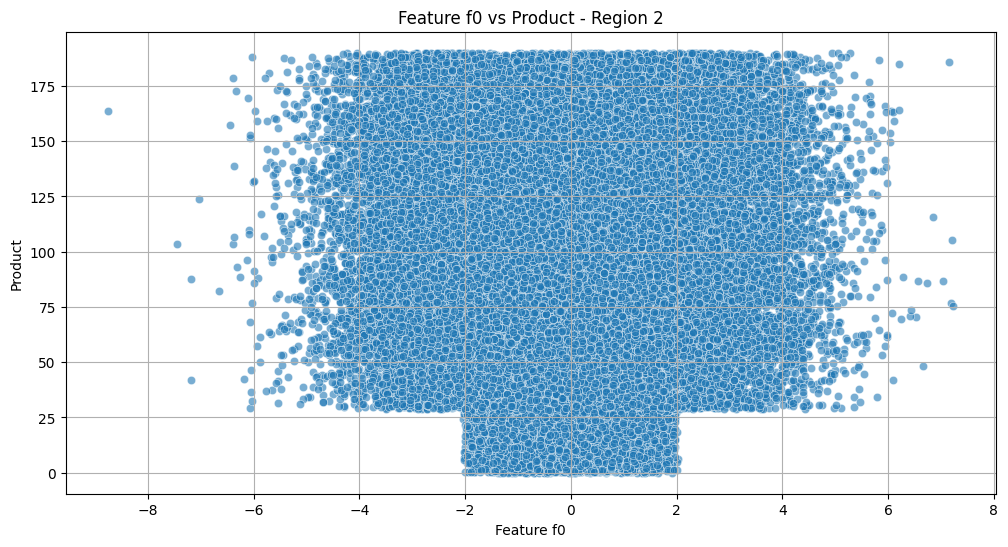

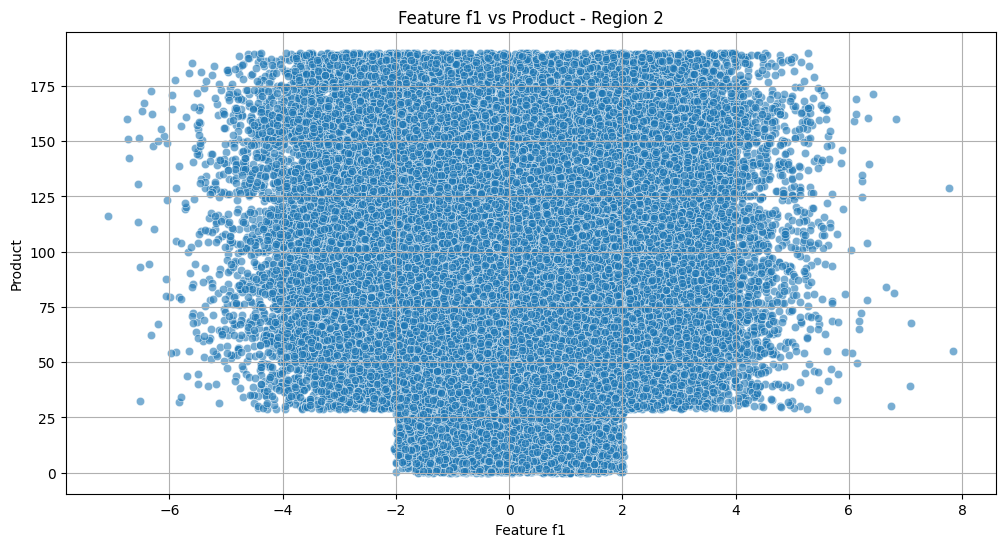

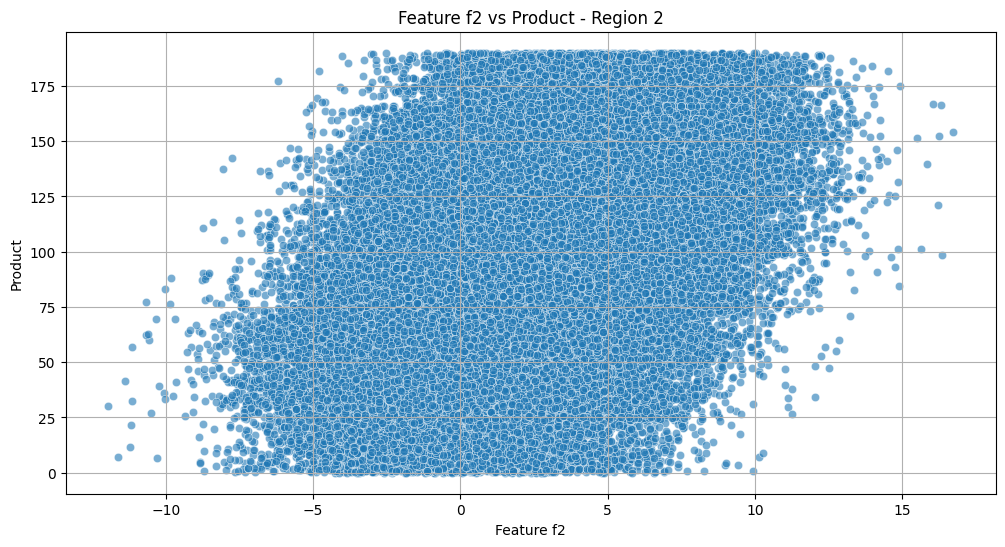

In [5]:

# Visualization of each dataset
def visualize_data(data, region_number):
    """Creates visualizations for the dataset."""
    
    # Using 'f0' as a feature for the x-axis and 'product' for the y-axis
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x='f0', y='product', alpha=0.6)
    plt.title(f'Feature f0 vs Product - Region {region_number}')
    plt.xlabel('Feature f0')
    plt.ylabel('Product')
    plt.grid(True)
    plt.show()

    # Using 'f1' as a feature for the x-axis and 'product' for the y-axis
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x='f1', y='product', alpha=0.6)
    plt.title(f'Feature f1 vs Product - Region {region_number}')
    plt.xlabel('Feature f1')
    plt.ylabel('Product')
    plt.grid(True)
    plt.show()

    # Using 'f2' as a feature for the x-axis and 'product' for the y-axis
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x='f2', y='product', alpha=0.6)
    plt.title(f'Feature f2 vs Product - Region {region_number}')
    plt.xlabel('Feature f2')
    plt.ylabel('Product')
    plt.grid(True)
    plt.show()

# Visualize each dataset
visualize_data(data_0, 0)
visualize_data(data_1, 1)
visualize_data(data_2, 2)


The scatterplots show the actual versus predicted volumes of reserves across three different regions. The x-axis represents the actual volume of reserves (in thousand barrels), while the y-axis denotes the predicted volume of reserves (also in thousand barrels).The red dashed line across all graphs represents the ideal line of perfect prediction, serving as a benchmark for assessing the accuracy of the models used.

For Region 0, the points are dispersed around a trend line indicating the general relationship but shows a major discrepency for higher values, showing innacuracies with predicting higher values. Region 0 shows no correlation between f0 or f1 vs volume of reserves but f2 does show a slight correlation.

Region 1 shows similar to f1, f0 shows horizontal bands at different Product levels which suggests a more complex relationship where Product values cluster regardless of the specific f0 value. This indicates a limited correlation. F1 displays multiple horizontal bands at various Product levels, indicating that while Product can have varying values, Feature f1 appears less determinative, showing less correlation. F2 shows a strong positive correlation between Feature f2 and Product, indicating that as Feature f2 increases, Product also tends to increase. In Region 1, the data points are more clustered, forming a tighter pattern around the red dashed line that signifies perfect prediction. This suggests a higher accuracy in predictions for this region.

Meanwhile, in Region 2, the points display a wide spread, again indicating variability in prediction accuracy, especially at higher actual reserve volumes. Region 2 show no correlation between f0, or f1 vs volume of reserves, but f2 once again shows a positive correlation, though slight.

Now I am going to split the data for each region by seperating the features from the target and then split the data 75/25.

In [6]:

# Region 0 Features and Target
features = data_0[['f0', 'f1', 'f2']]
target = data_0['product']
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.25, random_state=42)
# Resulting shapes
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Target Shape:", y_train.shape)
print("Validation Target Shape:", y_val.shape)


Training Features Shape: (75000, 3)
Validation Features Shape: (25000, 3)
Training Target Shape: (75000,)
Validation Target Shape: (25000,)


In [7]:

# Region 1 Features and Target
features = data_1[['f0', 'f1', 'f2']]
target = data_1['product']
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.25, random_state=42)
# Resulting shapes
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Target Shape:", y_train.shape)
print("Validation Target Shape:", y_val.shape)



Training Features Shape: (75000, 3)
Validation Features Shape: (25000, 3)
Training Target Shape: (75000,)
Validation Target Shape: (25000,)


In [8]:

# Region 2 Features and Target
features = data_2[['f0', 'f1', 'f2']]
target = data_2['product']
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.25, random_state=42)
# Resulting shapes
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Target Shape:", y_train.shape)
print("Validation Target Shape:", y_val.shape)



Training Features Shape: (75000, 3)
Validation Features Shape: (25000, 3)
Training Target Shape: (75000,)
Validation Target Shape: (25000,)


Next, I will train a linear regression model and make preditions for the validation set: 

In [9]:
# Create the datasets list first
datasets = [data_0, data_1, data_2]
results_list = []

for i in range(len(datasets)):
    # Split the data: 75% train, 25% validation
    X = datasets[i][['f0', 'f1', 'f2']]
    y = datasets[i]['product']
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.25, random_state=12345
    )
    
    # Train model on training set
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    predictions = model.predict(X_valid)
    
    # Store predictions in the results list
    results_list.append(predictions)

In [10]:
display(results_list[0])

display(results_list[1])

display(results_list[2])

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

array([ 82.66331365,  54.43178616,  29.74875995, ..., 137.87934053,
        83.76196568,  53.95846638])

array([ 93.59963303,  75.10515854,  90.06680936, ...,  99.40728116,
        77.77991248, 129.03241718])

In [11]:
# **Calculate Average Volume of Predicted Reserves**
average_volume0 = np.mean(results_list[0])
average_volume1 = np.mean(results_list[1])
average_volume2 = np.mean(results_list[2])

# **Calculate RMSE of the Model**
rmse0 = np.sqrt(mean_squared_error(y_valid, results_list[0]))
rmse1 = np.sqrt(mean_squared_error(y_valid, results_list[1]))
rmse2 = np.sqrt(mean_squared_error(y_valid, results_list[2]))

# **Print Results**
print(f"Average Volume of Predicted Reserves Region 0: {average_volume0}")
print(f"Average Volume of Predicted Reserves Region 1: {average_volume1}")
print(f"Average Volume of Predicted Reserves Region 2: {average_volume2}")
print(f"Model RMSE Region 0: {rmse0}")
print(f"Model RMSE Region 1: {rmse1}")
print(f"Model RMSE Region 2: {rmse2}")



Average Volume of Predicted Reserves Region 0: 92.59256778438035
Average Volume of Predicted Reserves Region 1: 68.728546895446
Average Volume of Predicted Reserves Region 2: 94.96504596800489
Model RMSE Region 0: 50.5033275225342
Model RMSE Region 1: 69.27323777220978
Model RMSE Region 2: 40.02970873393434


Region 0 has slightly less accuracy in its predictions and has slightly less volume of oil in each well.

Region 1 has the worst model performance (highest RMSE = 69.3) meaning it has the least accuracy in predicting the amount of oil in each well. Region 1 also has the lowest predicted reserves on average.

Region 2 has the best model performance (lowest RMSE = 40.0) meaning it has the most accuracy in predicting the amount of oil in each well. Region 2 also has the most amount of oil reserves predicted. From this information I would pick from Region 2 to drill the next oil well. 

Key Values:

In [12]:
revenue_per_barrel = 4_500
budget = 100_000_000
wells = 200
cost_per_well = budget / wells
min_well_revenue_needed = (cost_per_well/revenue_per_barrel)/1000

print(cost_per_well)
print(min_well_revenue_needed)


500000.0
0.11111111111111112



The budget for development per well is $500,000 USD. Each well needs to supply a minimum of 111.1 thousand barrels to cover the cost of the well.

- Region 0: 92.59 < 111.11 (not profitable)
  Region 0: Falls short by 18.52 thousand barrels (16.7% below break-even)
- Region 1: 68.73 < 111.11 (not profitable)
  Region 1: Falls short by 42.38 thousand barrels (38.1% below break-even)
- Region 2: 94.97 < 111.11 (not profitable)
  Region 2: Falls short by 16.14 thousand barrels (14.5% below break-even)

None of the regions average reserves that meet or exceed the break-even threshold of 111.11 thousand barrels. This indicates that developing wells in these regions would likely result in losses. Regions 0 and 2 come close the profitability with region 2 at 14.5% below break-even. 


I will start with picking the wells with the highest values of predictions.

In [13]:

# Step 1: Initialize the dictionary and counter
profitable_wells = {}
well_counter = 0


# Step 2: Collect ALL wells from each region (not just above threshold)
for region_num in range(3):
    predictions = results_list[region_num]
    
    # Create a list to store all wells from this region
    region_wells = []
    
    for well_index, prediction in enumerate(predictions):
        # Store ALL wells (remove the if condition!)
        region_wells.append({
            'prediction': prediction,
            'region': region_num,
            'well_index': well_index
        })
    
    # Step 3: Sort wells by prediction (highest first)
    region_wells.sort(key=lambda well: well['prediction'], reverse=True)
    
    # Step 4: Take only the top 200
    top_200_wells = region_wells[:200]
    
    # Step 5: Add these to your main dictionary
   
for well in top_200_wells:
        profitable_wells[well_counter] = well
        well_counter += 1
display
(top_200_wells)



[{'prediction': 165.85683317435655, 'region': 2, 'well_index': 22636},
 {'prediction': 165.67968526604642, 'region': 2, 'well_index': 24690},
 {'prediction': 163.43996233207585, 'region': 2, 'well_index': 7811},
 {'prediction': 162.06258949943532, 'region': 2, 'well_index': 1581},
 {'prediction': 161.79747628158043, 'region': 2, 'well_index': 6751},
 {'prediction': 161.63272966100686, 'region': 2, 'well_index': 1850},
 {'prediction': 160.90714300602133, 'region': 2, 'well_index': 6095},
 {'prediction': 160.79107005223403, 'region': 2, 'well_index': 22066},
 {'prediction': 160.47889600997757, 'region': 2, 'well_index': 24980},
 {'prediction': 159.9905395320847, 'region': 2, 'well_index': 19063},
 {'prediction': 159.95661950470588, 'region': 2, 'well_index': 21633},
 {'prediction': 159.1863762634505, 'region': 2, 'well_index': 1923},
 {'prediction': 159.1131952951566, 'region': 2, 'well_index': 14264},
 {'prediction': 158.84142132012312, 'region': 2, 'well_index': 4018},
 {'prediction': 

The target value for each reserve is to atleast meet the break-even point of 111.1 thousand so as to not loose profit on each well. The smallest well in the list of 200 well reserves is 142.409 thousand which means every well on the top 200 is over the target value.

In [14]:
target_volume = budget/revenue_per_barrel
print(f"Target volume of reserves for top 200 wells: {target_volume:.2f} thousand barrels")

total_volume = sum(well['prediction'] for well in top_200_wells)
print(f"Total volume of reserves for top 200 wells: {total_volume:.2f} thousand barrels")
predicted_income = total_volume*revenue_per_barrel
print(f"Income of Reserves for Top 200 Wells: {predicted_income:.2f} USD")

Target volume of reserves for top 200 wells: 22222.22 thousand barrels
Total volume of reserves for top 200 wells: 29603.90 thousand barrels
Income of Reserves for Top 200 Wells: 133217543.96 USD


The target volume of the reserves is 22,222.22 thousand barrels. The top 200 wells are guestimated to have 29,603.90 thousand barrels in reserves. This means there is a potential revenue of 133.2 million from the top 200 wells. With a perdicted investment of 100 million, there is a predicted profit of 33.2 million USD. I am going to sort and select top 200 from all three region's and then calculate metrics for these top wells.

In [15]:
top_200_region_0 = np.sort(results_list[0])[::-1][:200]
display(top_200_region_0)

array([180.18071306, 176.25221317, 175.85062328, 175.65842896,
       173.29968618, 172.62797248, 172.50167789, 169.12423358,
       168.78760151, 168.20601476, 167.9553527 , 167.89493172,
       166.73719173, 166.64783024, 166.58664229, 166.51253196,
       165.77868214, 164.88665844, 164.76765859, 164.7464549 ,
       164.60991694, 164.51805395, 164.10007177, 163.63628349,
       163.35261037, 162.95212231, 162.2441628 , 162.24349816,
       161.92411048, 161.70643654, 161.70054385, 161.14661861,
       160.96571699, 160.94719592, 160.91870049, 160.56657568,
       160.49284653, 160.35757296, 160.31411761, 160.19923809,
       160.0642034 , 160.03644529, 159.92791076, 159.89191394,
       159.86367774, 159.68067978, 159.55030385, 159.50773314,
       159.03061812, 158.57697873, 158.57682628, 158.49080939,
       158.11221037, 158.1048762 , 157.90933803, 157.72043411,
       157.71395384, 157.53653905, 157.4295083 , 157.40358913,
       157.07172387, 156.83431917, 156.73182285, 156.69

In [16]:
top_200_region_1 = np.sort(results_list[1])[::-1][:200]
display(top_200_region_1)

array([139.81896981, 139.77342296, 139.70333031, 139.56093759,
       139.51675429, 139.4729438 , 139.47205891, 139.44650088,
       139.43165277, 139.42452597, 139.38874898, 139.30774543,
       139.25404759, 139.25068009, 139.15876273, 139.1434329 ,
       139.11526578, 139.10472303, 139.08129975, 139.07978165,
       139.07014053, 139.06671848, 139.05518926, 139.05255628,
       139.03526451, 139.02835462, 139.02255401, 139.00712372,
       139.0065201 , 139.0025295 , 139.00128309, 138.97996329,
       138.95407219, 138.95392375, 138.94436831, 138.93790535,
       138.93784463, 138.93609088, 138.93382169, 138.92497835,
       138.90826059, 138.90787204, 138.90642539, 138.89572203,
       138.89147041, 138.88937789, 138.88852548, 138.88751906,
       138.88730277, 138.88161812, 138.87033255, 138.86281988,
       138.85962626, 138.85914285, 138.8392558 , 138.83683753,
       138.8331988 , 138.82825512, 138.82820825, 138.8261413 ,
       138.82566959, 138.81246323, 138.81169436, 138.80

In [17]:
top_200_region_2 = np.sort(results_list[2])[::-1][:200]
display(top_200_region_2)

array([165.85683317, 165.67968527, 163.43996233, 162.0625895 ,
       161.79747628, 161.63272966, 160.90714301, 160.79107005,
       160.47889601, 159.99053953, 159.9566195 , 159.18637626,
       159.1131953 , 158.84142132, 157.58869037, 157.15664851,
       156.86005825, 156.57696724, 156.21517371, 156.05944004,
       155.99726798, 155.84901909, 155.84236129, 155.76590908,
       155.66456621, 155.59138885, 154.99613618, 154.24937687,
       154.19453774, 154.17171937, 153.82903089, 153.81311512,
       153.76961857, 153.65059807, 153.60866789, 153.30168881,
       152.80154046, 152.54408434, 152.51735229, 152.23743012,
       152.08364982, 152.01820434, 151.54286075, 151.27720085,
       150.841098  , 150.72386796, 150.68665259, 150.67457991,
       150.50631759, 150.4181502 , 150.41550335, 149.82337414,
       149.57955981, 149.3790756 , 149.30798057, 149.29295508,
       149.11269363, 149.09832081, 148.99705066, 148.87576194,
       148.82975017, 148.78806918, 148.76793597, 148.67

In [18]:
# Mean, Median, St Dev, and Total Reserves:
mean_value_region_0 = np.mean(top_200_region_0)
median_value_region_0 = np.median(top_200_region_0)  # Use np.median() instead of .median()
std_dev_value_region_0 = np.std(top_200_region_0)
total_reserves_region_0 = np.sum(top_200_region_0)  # or just top_200_region_0.sum()


print("Statistics for Region 0:")
print(f"Mean: {mean_value_region_0}")
print(f"Median: {median_value_region_0}")
print(f"Standard Deviation: {std_dev_value_region_0}")
print(f"Total Reserves: {total_reserves_region_0}")

predicted_income_total_region_0 = total_reserves_region_0 * 4500
print(f"Total reserves for top 200 wells in Region 0: {total_reserves_region_0}")
print(f"Predicted total income for Region 0: ${predicted_income_total_region_0:,.2f}")
print(f"Target volume of reserves for top 200 wells: {target_volume:.2f} thousand barrels")
print( )

# Mean, Median, St Dev and Total Reserves:
mean_value_region_1 = np.mean(top_200_region_1)
median_value_region_1 = np.median(top_200_region_1)  # Use np.median() instead of .median()
std_dev_value_region_1 = np.std(top_200_region_1)
total_reserves_region_1 = np.sum(top_200_region_1)  # or just top_200_region_0.sum()


print("Statistics for Region 1:")
print(f"Mean: {mean_value_region_1}")
print(f"Median: {median_value_region_1}")
print(f"Standard Deviation: {std_dev_value_region_1}")
print(f"Total Reserves: {total_reserves_region_1}")

predicted_income_total_region_1 = total_reserves_region_1 * 4500
print(f"Total reserves for top 200 wells in Region 1: {total_reserves_region_1}")
print(f"Predicted total income for Region 1: ${predicted_income_total_region_1:,.2f}")
print(f"Target volume of reserves for top 200 wells: {target_volume:.2f} thousand barrels")
print()

# Mean, Median, St Dev and Total Reserves Region 2:
mean_value_region_2 = np.mean(top_200_region_2)
median_value_region_2 = np.median(top_200_region_2)  # Use np.median() instead of .median()
std_dev_value_region_2 = np.std(top_200_region_2)
total_reserves_region_2 = np.sum(top_200_region_2)  # or just top_200_region_0.sum()



print("Statistics for Region 2:")
print(f"Mean: {mean_value_region_2}")
print(f"Median: {median_value_region_2}")
print(f"Standard Deviation: {std_dev_value_region_2}")
print(f"Total Reserves: {total_reserves_region_2}")

predicted_income_total_region_2 = total_reserves_region_2 * 4500
print(f"Total reserves for top 200 wells in Region 2: {total_reserves_region_2}")
print(f"Predicted total income for Region 2: ${predicted_income_total_region_2:,.2f}")
print( )
print(f"Target volume of reserves for top 200 wells: {target_volume:.2f} thousand barrels")





Statistics for Region 0:
Mean: 155.511654194057
Median: 153.7837239198866
Standard Deviation: 6.33547304448608
Total Reserves: 31102.3308388114
Total reserves for top 200 wells in Region 0: 31102.3308388114
Predicted total income for Region 0: $139,960,488.77
Target volume of reserves for top 200 wells: 22222.22 thousand barrels

Statistics for Region 1:
Mean: 138.73013391081713
Median: 138.65195974471266
Standard Deviation: 0.2839969368687716
Total Reserves: 27746.026782163426
Total reserves for top 200 wells in Region 1: 27746.026782163426
Predicted total income for Region 1: $124,857,120.52
Target volume of reserves for top 200 wells: 22222.22 thousand barrels

Statistics for Region 2:
Mean: 148.01949329159174
Median: 146.31862845978173
Standard Deviation: 5.322142464837702
Total Reserves: 29603.898658318347
Total reserves for top 200 wells in Region 2: 29603.898658318347
Predicted total income for Region 2: $133,217,543.96

Target volume of reserves for top 200 wells: 22222.22 thou


The target volume of the reserves is 22,222.22 thousand barrels while the budget is 100 million USD. 

Target vs. Predicted Comparison: The target is 22,222.22 thousand barrels, predictions show:
Region 0: 31,102.3 thousand barrels (40% above target)
Region 1: 27,746.0 thousand barrels (25% above target)
Region 2: 29,603.9 thousand barrels (33% above target)
Reserve Sufficiency: All regions exceed the minimum target volume

This means that all regions are expected to be profitable regardless of which one is chosen. There is a decent different between Region 0 and Region 1 (15% different in profitability) in their reserves. 

After sorting and selecting the top 200 reserves from all three regions, I found that the profit from  Region 0's total reserves is the greatest amount at 31102.3 with a mean of 155.51, which gives a total predicted income of 139 million. This is a 39% profit return compared to Region 2's 33% (a potential revenue of 133.2 million, mean of 148) and Region 1 is 24% (124 million, mean of 138.7).


Next, I am calculating the risk using bootstrapping with 1000 iterations by assesing the probability of loss (profit < $100M budget) and I will return the risk as a percentage.

In [19]:
def fit_model_and_predict(region_data):
    """Fit model and generate predictions for the given region data."""
    model = LinearRegression().fit(region_data[['f0', 'f1', 'f2']], region_data['product'])
    predictions = model.predict(region_data[['f0', 'f1', 'f2']])
    return predictions

def calculate_profit(predictions, targets):
    """Calculate profit based on the top 200 actual targets after drilling."""
    # Select the top 200 indices based on predictions
    top_200_indices = np.argsort(predictions)[-200:]  # Get indices of top 200 predicted reserves
    
    # Retrieve corresponding actual target values for these top 200 predictions
    top_200_targets = targets[top_200_indices]
    
    # Calculate total reserves from the actual targets
    total_reserves = np.sum(top_200_targets)
    predicted_income = total_reserves * 4500
    profit = predicted_income - 100_000_000  # $100M budget
    return profit

def calculate_risk(region_data, n_iterations=1000):
    """Calculate risk using bootstrapping."""
    predictions = fit_model_and_predict(region_data)
    targets = region_data['product'].values
    profits = []

    for i in range(n_iterations):
        if i % 100 == 0:
            print(f"Iteration {i}/{n_iterations}")

        # Resample with replacement from the original data
        sampled_indices = np.random.choice(len(targets), size=500, replace=True)
        sampled_predictions = predictions[sampled_indices]
        sampled_targets = targets[sampled_indices]

        # Calculate profit using TOP 200 predictions
        profit = calculate_profit(sampled_predictions, sampled_targets)
        profits.append(profit)

        if i < 5:
            print(f"Iteration {i}: Profit = ${profit:,.0f}")

    # Results processing
    avg_profit = np.mean(profits)
    confidence_interval = (np.percentile(profits, 2.5), np.percentile(profits, 97.5))
    risk_of_loss = sum(p < 0 for p in profits) / n_iterations * 100

    return {
        'profits': profits,
        'avg_profit': avg_profit,
        'confidence_interval': confidence_interval,
        'risk_of_loss': risk_of_loss
    }

# Example usage
data_sets = [data_0, data_1, data_2]
results = {f"Region_{i}": calculate_risk(data) for i, data in enumerate(data_sets)}

# Print formatted results
for region, result in results.items():
    print(f"\n--- {region} ---")
    print(f"Risk of loss: {result['risk_of_loss']:.1f}%")
    print(f"Avg profit: ${result['avg_profit']:,.0f}")
    print(f"95% CI: [${result['confidence_interval'][0]:,.0f}, ${result['confidence_interval'][1]:,.0f}]")


Iteration 0/1000
Iteration 0: Profit = $5,437,028
Iteration 1: Profit = $6,480,762
Iteration 2: Profit = $9,611,397
Iteration 3: Profit = $1,209,638
Iteration 4: Profit = $-1,065,993
Iteration 100/1000
Iteration 200/1000
Iteration 300/1000
Iteration 400/1000
Iteration 500/1000
Iteration 600/1000
Iteration 700/1000
Iteration 800/1000
Iteration 900/1000
Iteration 0/1000
Iteration 0: Profit = $2,900,916
Iteration 1: Profit = $-488,353
Iteration 2: Profit = $5,084,130
Iteration 3: Profit = $6,339,323
Iteration 4: Profit = $1,109,561
Iteration 100/1000
Iteration 200/1000
Iteration 300/1000
Iteration 400/1000
Iteration 500/1000
Iteration 600/1000
Iteration 700/1000
Iteration 800/1000
Iteration 900/1000
Iteration 0/1000
Iteration 0: Profit = $3,133,423
Iteration 1: Profit = $4,945,694
Iteration 2: Profit = $1,572,341
Iteration 3: Profit = $1,334,629
Iteration 4: Profit = $3,698,519
Iteration 100/1000
Iteration 200/1000
Iteration 300/1000
Iteration 400/1000
Iteration 500/1000
Iteration 600/100

# Summary of Profit Iterations

## Region 0:
Iteration 0: Profit = 5,437,028
Iteration 1: Profit = 6,480,762
Iteration 2: Profit = 9,611,397
Iteration 3: Profit = 1,209,638
Iteration 4: Profit = -1,065,993

## Region 1:
Iteration 0: Profit = 2,900,916
Iteration 1: Profit = -488,353
Iteration 2: Profit = 5,084,130
Iteration 3: Profit = 6,339,323
Iteration 4: Profit = 1,109,561

## Region 2:
Iteration 0: Profit = 3,133,423
Iteration 1: Profit = 4,945,694
Iteration 2: Profit = 1,572,341
Iteration 3: Profit = 1,334,629
Iteration 4: Profit = 3,698,519

# Overall Results:

## Region 0:
Risk of Loss: 6.2%

Average Profit: 4,301,250

95% Confidence Interval: [-1,093,910, 9,402,939]

## Region 1:
Risk of Loss: 2.0%

Average Profit: 4,492,910

95% Confidence Interval: [310,728, 8,788,410]

## Region 2:
Risk of Loss: 7.5%

Average Profit: 3,688,881

95% Confidence Interval: [-1,167,160, 8,437,012]



Region 1 has the lowest risk of loss at 2.0%, while Region 2 has the highest at 7.5%. Region 1 also has the highest average profit at 4,301,250. All regions show a wide range of potential profits, indicating variability in outcomes. Regions 0 and 2 have negative lower bounds in their confidence intervals, suggesting that there is a possibility of incurring losses. With this, I recommend:
### Region 0


I have now prepared the data for each region, trained and tested the model for each region while taking into account all the business conditions, prepared for profit calculations, wrote functions to calculate profit from a set of selected oil wells and model predictions, and caculated the risks and profit for each region using bootstrapping. From this, I suggest Region  if OilyGiant is wanting to go for the most profit and less risk, and Region 0 if they are looking for the most profit with a higher risk. Region 2 is subsequentially the least profitable and highest risk, making it not apart of my recommendation. 